In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
def h(w_0, w_1, x):
    return w_0 + w_1*x

In [3]:
def loss_function(w_0, w_1, df):
    n = df.area.shape[0]
    cost = 0

    for x, y in zip(df.area, df.price):
        cost = cost + (h(w_0, w_1, x) - y) ** 2

    return cost/(2*n)

In [4]:
def grade_step(w_0, w_1, grad_0, grad_1, learning_rate = 0.001):

    w_0 = w_0 - learning_rate * grad_0
    w_1 = w_1 - learning_rate * grad_1
    return w_0, w_1

In [5]:
df = pd.read_csv('Housing.csv')
# df.plot(x='area', y='price', kind='scatter', figsize=(12, 8))

In [6]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
def normalization(data):
    mean = np.mean(data)
    value_range = max(data) - min(data)
    
    result = []
    for i in data:
        result.append((i-mean)/value_range)
    return result

In [8]:
def grad_w_0(w_0, w_1, df):
    n = df.area.shape[0]
    cost = 0

    for x, y in zip(df.area, df.price):
        cost = cost + (h(w_0, w_1, x) - y)

    return cost/n

def grad_w_1(w_0, w_1, df):
    n = df.area.shape[0] 
    cost = 0

    for x, y in zip(df.area, df.price):
        cost = cost + (h(w_0, w_1, x) - y) * x

    return cost/n

In [9]:
def grad_descent(weights, df, num_inter, learning_rate=0.01, epsilon=0.0000000001):
    w_0, w_1 = weights
    loss = loss_function(w_0, w_1, df)
    loss_history = [loss]
    
    for i in range(num_inter):
        d_w_0 = grad_w_0(w_0, w_1, df)
        d_w_1 = grad_w_1(w_0, w_1, df)        
        w_0 , w_1 = grade_step(w_0, w_1, d_w_0, d_w_1, learning_rate = learning_rate)
        loss = loss_function(w_0, w_1, df)

        if abs(loss-loss_history[-1]) < epsilon:
            loss_history.append(loss)
            break
    
        loss_history.append(loss)

    return w_0, w_1, loss_history

In [10]:
norm = pd.DataFrame()
norm['price'] = normalization(df['price'])
norm['area'] = normalization(df['area'])
norm.tail()

,price,area
540,-0.255128,-0.147804
541,-0.259704,-0.189041
542,-0.261189,-0.105192
543,-0.261189,-0.153989
544,-0.261189,-0.089384


In [11]:
w_0, w_1, history = grad_descent((0., 0.), norm, 1000)
len(history)

1001

In [12]:
print(w_0)
print(w_1)

3.201516523854852e-17
0.11589612692271574


In [13]:
w_0, w_1, history_ext = grad_descent((w_0, w_1), norm, 1000)
print(w_0, w_1, len(history_ext))

3.32975237596523e-17 0.2087121126353275 1001


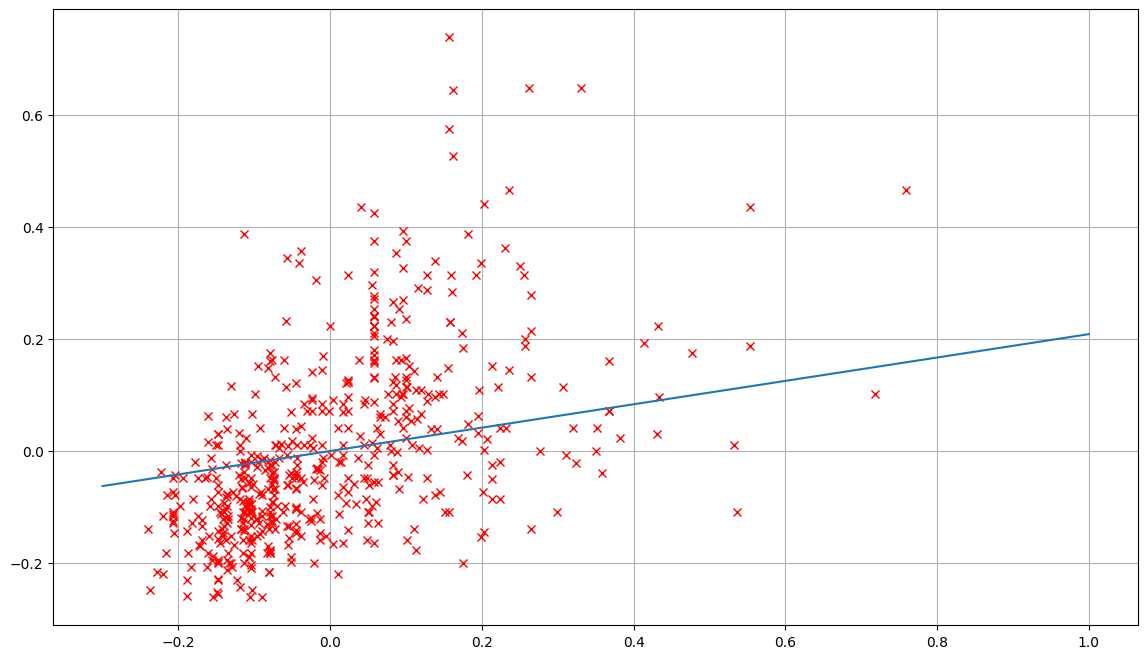

In [14]:
plt.figure(figsize=(14, 8))
plt.plot(norm.area, norm.price, 'rx')
x = np.linspace(-0.3, 1, 500)
plt.plot(x, h(w_0, w_1, x))
plt.grid()

In [15]:
from sklearn import linear_model

In [16]:
model = linear_model.LinearRegression()


In [17]:
X = np.array([norm.area]).T
X.shape

(545, 1)

In [18]:
y = np.array(norm.price)
y.shape

(545,)

In [19]:
model.fit(X, y)

LinearRegression()

In [20]:
model.coef_

array([0.58196837])

In [21]:
model.intercept_

6.353102831524844e-17

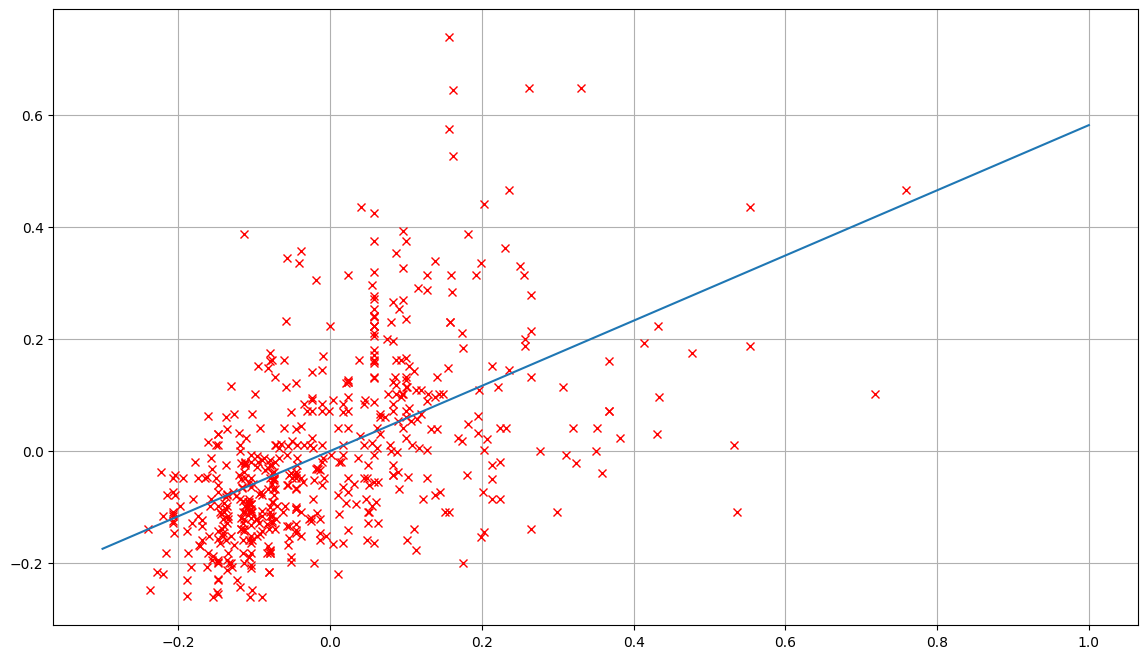

In [22]:
plt.figure(figsize=(14, 8))
plt.plot(norm.area, norm.price, 'rx')
x = np.linspace(-0.3, 1, 500)
plt.plot(x, h(model.intercept_, model.coef_, x))
plt.grid()